# Checkpoint 3. EDA

Цель этого этапа – получить необходимую интуицию о данных и о задаче, с которыми вы работаете.

От вас требуется изучить особенности данных:
* Рассчитать основные статистики для вещественных и категориальных признаков (df.describe(include=’all’))
* Есть ли пропущенные значения. Сколько. Какова их доля от общего числа объектов для каждого конкретного признака. И, в целом, насколько ваш датасет “разрежен” в контексте пропущенных значений. Выдвинуть и (желательно) проверить гипотезу, что могут означать пропущенные значения? Осмысленно и аргументированно обработать пропуски.
* Есть ли ошибочные  (например, отрицательный возраст или пятиметровый рост человека; 3-й класс в задаче бинарной классификации) значения (признаки, целевая переменная) в данных. Обработать их.
* Есть ли выбросы в данных? По возможности обработать их.
* Изучить поведение каждого признака в отдельности, его связь с целевой переменной, а также попарные корреляции (в т.ч и в особенности с таргетом). Визуализировать попарные распределения признаков (sns.pairplot()) и корреляции наиболее значимых.
* Построить подходящие сводные таблицы и прочие диаграммы.
Если проведённый вами анализ позволяет сделать какие-либо выводы, запишите их текстом максимально развернуто. Упомяните, как вы планируете задействовать приобретенные вами на этом этапе знания о вашей задаче.
* Любые другие (не перечисленные выше) формы разведочного анализа данных и интересные формы визуализации данных открыто приветствуются. Также отметим, что диаграммы должны быть информативными, а выводы прозрачными.

Разведочный анализ должен быть проведен в python, выводы запишите в отдельный файл EDA.txt. На гитхаб выложите и код, и файл с выводами.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [2]:
df = pd.read_csv('../data/expanded_data_with_OSM.csv', sep = ',')

In [3]:
df.head()

id  atm_group                                 address  \
0  8526.0       32.0  EMELYANOVA,34          Y-SAKHALINSK      
1  8532.0       32.0  KOMSOMOLSKAYA,259B     Y.SAKHALINSK      
2  8533.0       32.0  KOMMUN. PR., 32        YUZHNO SAKHAL     
3  8684.0       32.0  LENINGRADSKIY PR.,76A  MOSCOW            
4    37.0       32.0  GVARDEYSKAYA PL., 2    NORILSK           

                                         address_rus        lat         lng  \
0  улица А.О. Емельянова, 34, Южно-Сахалинск, Сах...  46.940995  142.738319   
1  Комсомольская улица, 259, Южно-Сахалинск, Саха...  46.937353  142.753348   
2  Коммунистический проспект, Южно-Сахалинск, Сах...  46.959413  142.741113   
3  Ленинградский проспект, 76А, Москва, Россия, 1...  55.805827   37.515146   
4  Гвардейская площадь, 2, Норильск, Красноярский...  69.343541   88.211228   

  test_train_flag                               geometry  \
0           train  POINT (142.738319 46.940994999999994)   
1           train   POINT (142.75334799999996 46.937353)   
2           train           POINT (142.741113 46.959413)   
3           train            POINT (37.515146 55.805827)   
4           train            POINT (88.211228 69.343541)   

   distance_to_fast_food  distance_to_clothes  ...  \
0            1101.997929           815.369715  ...   
1            1177.665235           141.531360  ...   
2             536.421857          1054.650591  ...   
3              10.006280            18.646221  ...   
4            1264.514620          2159.536521  ...   

   distance_to_railway_station  distance_to_airport  distance_to_parking  \
0                  2888.292033         39774.216642          2892.577916   
1                  3143.092355         40364.561477          2767.793411   
2                  1734.715409         36765.157465          1815.884777   
3                   111.400631         73227.945390           106.652808   
4                  9329.940868                  NaN          5763.343722   

   distance_to_parking_underground  cnt_apart_200m  cnt_banks_200m  \
0                      2346.129844               9               0   
1                      2124.799118              17               0   
2                      1864.222802               4               1   
3                       471.901686              14               5   
4                      5842.299373              13               0   

   cnt_atm_200m             cities                       regions  \
0             0  Yuzhno-Sakhalinsk  Far Eastern Federal District   
1             0  Yuzhno-Sakhalinsk  Far Eastern Federal District   
2             0  Yuzhno-Sakhalinsk  Far Eastern Federal District   
3             4             Moscow      Central Federal District   
4             0            Norilsk     Siberian Federal District   

             states  
0   Sakhalin Oblast  
1   Sakhalin Oblast  
2   Sakhalin Oblast  
3            Moscow  
4  Krasnoyarsk Krai  

[5 rows x 51 columns]

**Изобразим наблюдения на карте + посмотрим представленность регионов/городов в датасете**

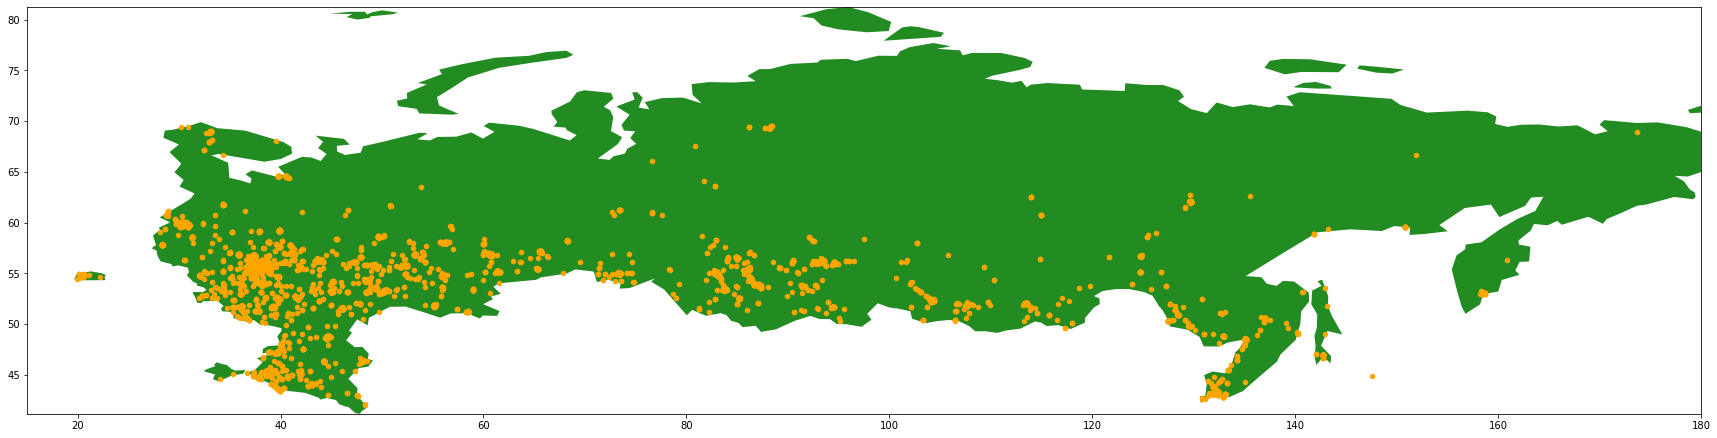

In [4]:
geometry = [Point(xy) for xy in zip(df['lng'], df['lat'])]

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
russia = world.query('name == "Russia"')
# cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
banks = GeoDataFrame(df, geometry=geometry)  

# ax.set_aspect('equal')
ax = russia.plot(figsize=(30, 30), color='forestgreen')
banks.plot(ax=ax, color='orange', markersize=20)

minx, miny, maxx, maxy = russia.total_bounds
ax.set_xlim(15, maxx)
ax.set_ylim(miny, maxy);

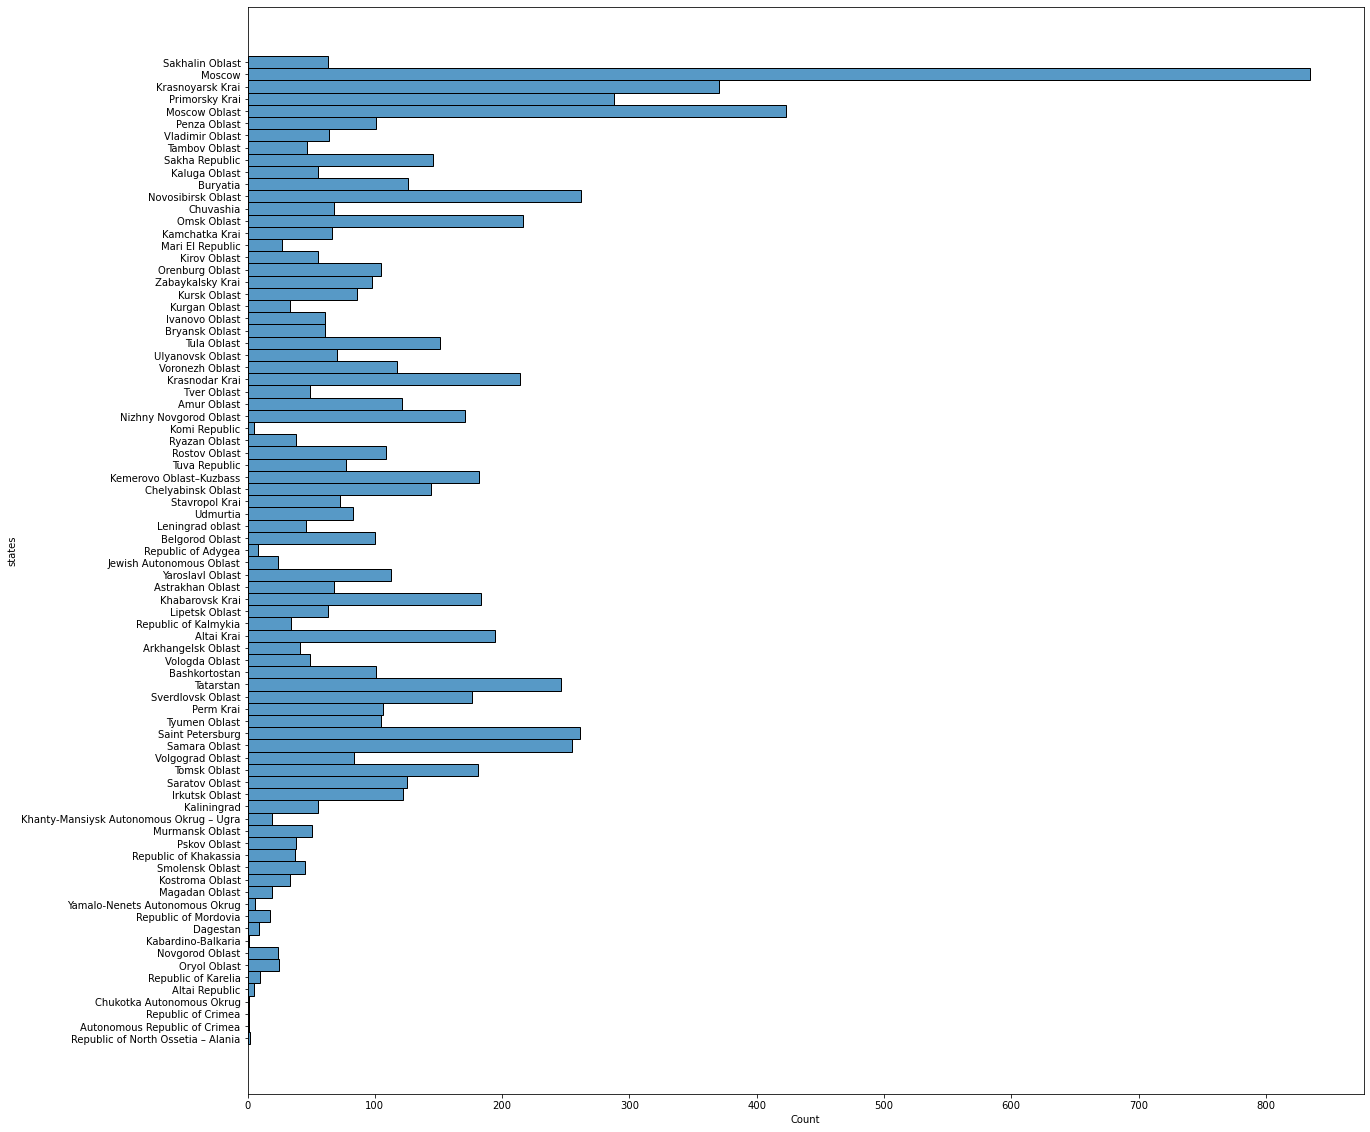

In [5]:
fig, ax = plt.subplots(figsize=(20,20))
sns.histplot(data=df, y=df['states']);

<AxesSubplot:xlabel='Count', ylabel='regions'>

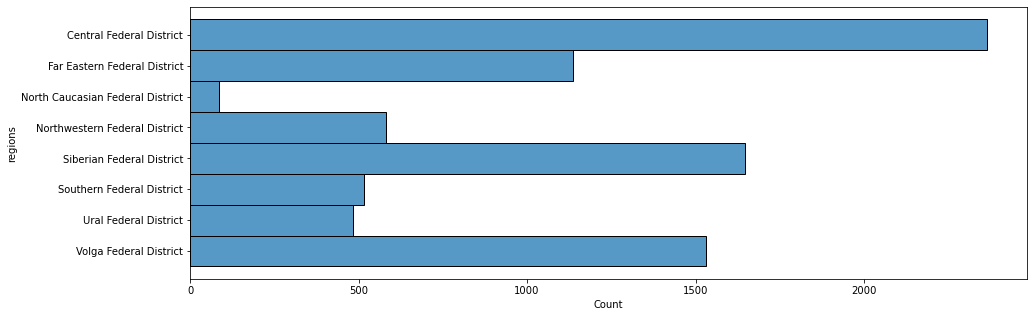

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df, y=df['regions'].sort_values())

## Базовые статистики

In [7]:
df.describe(include='all').iloc[:,0:9]

C:\Users\User\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


id    atm_group                                 address  \
count   8345.000000  8345.000000                                    8345   
unique          NaN          NaN                                    7126   
top             NaN          NaN  HOROSHEVSKOE SH,V38       MOSKVA         
freq            NaN          NaN                                       7   
mean    4412.909227  4405.440024                                     NaN   
std     2542.997777  2443.152067                                     NaN   
min        1.000000    32.000000                                     NaN   
25%     2226.000000  1942.000000                                     NaN   
50%     4401.000000  5478.000000                                     NaN   
75%     6605.000000  5478.000000                                     NaN   
max     8811.000000  8083.000000                                     NaN   

                                              address_rus          lat  \
count                                                8345  8345.000000   
unique                                               6147          NaN   
top     квартал В-13, городской округ Волгодонск, Рост...          NaN   
freq                                                   10          NaN   
mean                                                  NaN    54.138304   
std                                                   NaN     4.329293   
min                                                   NaN    42.057080   
25%                                                   NaN    52.243997   
50%                                                   NaN    55.060936   
75%                                                   NaN    56.116673   
max                                                   NaN    69.495093   

                lng test_train_flag                 geometry  \
count   8345.000000            8345                     8345   
unique          NaN               2                     6147   
top             NaN           train  POINT (42.207164 47.54)   
freq            NaN            5957                       10   
mean      63.500873             NaN                      NaN   
std       32.787366             NaN                      NaN   
min       19.941530             NaN                      NaN   
25%       37.851107             NaN                      NaN   
50%       49.071694             NaN                      NaN   
75%       84.950218             NaN                      NaN   
max      173.706490             NaN                      NaN   

        distance_to_fast_food  
count             7627.000000  
unique                    NaN  
top                       NaN  
freq                      NaN  
mean               974.398453  
std               1471.802539  
min                  0.000000  
25%                160.864343  
50%                451.854329  
75%               1157.927365  
max               9990.876014

In [8]:
df.describe(include='all').iloc[:,10:19]

C:\Users\User\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


distance_to_vending_parking  distance_to_cafe  distance_to_pharmacy  \
count                   2006.000000       8039.000000           8020.000000   
unique                          NaN               NaN                   NaN   
top                             NaN               NaN                   NaN   
freq                            NaN               NaN                   NaN   
mean                    3114.097863        800.755020            588.162113   
std                     2879.151832       1255.423507            988.169313   
min                       21.102462          0.000000              0.000000   
25%                      556.698057        150.445029            124.883215   
50%                     2175.261180        376.765176            286.370488   
75%                     5197.360775        900.759650            621.104264   
max                     9931.143303       9916.390589           9932.269371   

        distance_to_atm  distance_to_cinema  distance_to_shoe_shop  \
count       7876.000000         6665.000000            7181.000000   
unique              NaN                 NaN                    NaN   
top                 NaN                 NaN                    NaN   
freq                NaN                 NaN                    NaN   
mean         689.645493         2827.939577            1621.446897   
std         1215.363205         2312.088205            1840.099651   
min            0.000000            6.234851               0.000000   
25%           60.074594         1011.066455             353.313879   
50%          265.316907         2209.389012             973.083097   
75%          755.077114         4103.949774            2179.676907   
max         9934.011760         9969.840086            9995.686213   

        distance_to_bank  distance_to_supermarket  distance_to_restaurant  
count        8126.000000              8019.000000             7532.000000  
unique               NaN                      NaN                     NaN  
top                  NaN                      NaN                     NaN  
freq                 NaN                      NaN                     NaN  
mean          713.978590               653.261863             1370.907192  
std          1185.605600              1058.264165             1684.049371  
min             0.000000                 0.000000                1.666452  
25%            86.493884               120.827341              285.711279  
50%           304.943919               340.715767              762.892613  
75%           804.822747               723.095842             1718.330960  
max          9987.430829              9880.046394             9989.799060

In [9]:
df.describe(include='all').iloc[:,20:29]

C:\Users\User\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


distance_to_convenience  distance_to_vending_any  \
count               8134.000000              5425.000000   
unique                      NaN                      NaN   
top                         NaN                      NaN   
freq                        NaN                      NaN   
mean                 632.681106              2834.225965   
std                  878.709983              2476.393920   
min                    0.000000                 0.000000   
25%                  198.534037               857.189146   
50%                  376.726937              2020.452641   
75%                  716.483567              4230.691827   
max                 9835.193145              9990.357340   

        distance_to_bank_Сбербанк  distance_to_bank_ВТБ  \
count                 7588.000000           6353.000000   
unique                        NaN                   NaN   
top                           NaN                   NaN   
freq                          NaN                   NaN   
mean                  1238.331226           2492.635802   
std                   1434.737900           2319.972343   
min                      2.785611              0.651168   
25%                    394.475374            626.784129   
50%                    780.579909           1814.718247   
75%                   1491.280176           3743.184111   
max                   9987.430829           9977.131708   

        distance_to_bank_Альфа-Банк  distance_to_bank_Росбанк  \
count                   5248.000000               4200.000000   
unique                          NaN                       NaN   
top                             NaN                       NaN   
freq                            NaN                       NaN   
mean                    2785.338404               3589.917254   
std                     2469.224365               2720.635840   
min                        3.948990                  0.723947   
25%                      818.914242               1329.262164   
50%                     2035.740606               2889.746951   
75%                     4181.924605               5528.849632   
max                     9998.258099               9996.568230   

        distance_to_atm_Сбербанк  distance_to_atm_ВТБ  \
count                5967.000000          2712.000000   
unique                       NaN                  NaN   
top                          NaN                  NaN   
freq                         NaN                  NaN   
mean                 2944.411144          3935.168928   
std                  2642.528094          2809.893322   
min                     0.571634             3.238792   
25%                   789.718805          1451.242567   
50%                  2044.408624          3560.518372   
75%                  4617.103740          6097.635803   
max                  9994.774690          9995.763724   

        distance_to_atm_Альфа-Банк  
count                  3098.000000  
unique                         NaN  
top                            NaN  
freq                           NaN  
mean                   3418.433053  
std                    2691.676396  
min                       0.000000  
25%                    1096.508521  
50%                    2800.173484  
75%                    5407.422275  
max                    9997.371247

In [10]:
df.describe(include='all').iloc[:,30:39]

C:\Users\User\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


distance_to_retail  distance_to_residential  distance_to_office  \
count          7910.000000              7659.000000         7033.000000   
unique                 NaN                      NaN                 NaN   
top                    NaN                      NaN                 NaN   
freq                   NaN                      NaN                 NaN   
mean            807.417556              2264.217033         1797.270589   
std            1225.336322              1997.788132         1942.446444   
min               0.000000                 0.000000            0.000000   
25%             136.541649               800.030399          475.277513   
50%             407.879113              1648.994008         1097.172563   
75%             936.503317              3137.062238         2356.607389   
max            9951.142196              9969.577315         9974.277102   

        distance_to_commercial  distance_to_detached  \
count              7868.000000           6963.000000   
unique                     NaN                   NaN   
top                        NaN                   NaN   
freq                       NaN                   NaN   
mean               1107.591982           2793.574959   
std                1442.307482           2318.878926   
min                   0.000000              0.000000   
25%                 267.283598            965.706025   
50%                 626.459986           2137.670627   
75%                1326.088212           4027.138724   
max                9944.772988           9999.707061   

        distance_to_train_station  distance_to_apartments  distance_to_house  \
count                 6324.000000             8155.000000        8124.000000   
unique                        NaN                     NaN                NaN   
top                           NaN                     NaN                NaN   
freq                          NaN                     NaN                NaN   
mean                  3848.080646              349.815935        1567.059271   
std                   2580.272652              779.290727        1453.750609   
min                      0.000000                0.000000           0.000000   
25%                   1725.545701               34.379899         569.400085   
50%                   3405.766450              135.677210        1121.033966   
75%                   5670.682548              337.328264        2086.590586   
max                   9996.290069             9816.218331        9878.543679   

        distance_to_railway_halt  
count                8012.000000  
unique                       NaN  
top                          NaN  
freq                         NaN  
mean                 9799.029919  
std                 13984.069026  
min                    83.102492  
25%                  2988.105289  
50%                  5351.530322  
75%                  9547.289969  
max                 97864.692703

In [11]:
df.describe(include='all').iloc[:,40:50]

C:\Users\User\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


distance_to_bus_stop  distance_to_railway_station  \
count            8318.000000                  8079.000000   
unique                   NaN                          NaN   
top                      NaN                          NaN   
freq                     NaN                          NaN   
mean              930.733563                  5424.075745   
std              4154.627499                  9357.217337   
min                11.069262                     6.541512   
25%               135.101977                  1385.158133   
50%               232.682559                  3087.724479   
75%               412.110902                  5753.401089   
max             85935.798307                 99159.152418   

        distance_to_airport  distance_to_parking  \
count           5334.000000          7460.000000   
unique                  NaN                  NaN   
top                     NaN                  NaN   
freq                    NaN                  NaN   
mean           43553.315011          1759.262574   
std            22622.849328          1885.221998   
min             2180.203415            25.136211   
25%            26001.147979           515.252329   
50%            40171.775177          1132.012590   
75%            61059.686640          2229.316664   
max            99859.830930          9976.999178   

        distance_to_parking_underground  cnt_apart_200m  cnt_banks_200m  \
count                       3446.000000     8345.000000     8345.000000   
unique                              NaN             NaN             NaN   
top                                 NaN             NaN             NaN   
freq                                NaN             NaN             NaN   
mean                        3509.705348        5.905692        0.968844   
std                         2525.030531        6.340366        1.507090   
min                            6.818753        0.000000        0.000000   
25%                         1443.623461        0.000000        0.000000   
50%                         2914.218594        4.000000        0.000000   
75%                         5122.183412       10.000000        1.000000   
max                         9956.745817       53.000000       13.000000   

        cnt_atm_200m  cities                   regions  
count    8345.000000    8345                      8343  
unique           NaN    1003                         8  
top              NaN  Moscow  Central Federal District  
freq             NaN     796                      2366  
mean        1.278490     NaN                       NaN  
std         2.262835     NaN                       NaN  
min         0.000000     NaN                       NaN  
25%         0.000000     NaN                       NaN  
50%         0.000000     NaN                       NaN  
75%         2.000000     NaN                       NaN  
max        25.000000     NaN                       NaN

Выбросов нет, потому что почти все признаки это расстояния от банкомата до какого-либо объекта в пределах заданного диаметра

## Пропуски

In [12]:
pd.DataFrame(round(df.isna().sum()/len(df) * 100, 2).sort_values(ascending=False))

distance_to_vending_parking        75.96
distance_to_atm_Росбанк            73.57
distance_to_atm_ВТБ                67.50
distance_to_atm_Альфа-Банк         62.88
distance_to_parking_underground    58.71
distance_to_bank_Росбанк           49.67
distance_to_bank_Альфа-Банк        37.11
distance_to_airport                36.08
distance_to_vending_any            34.99
distance_to_tram_stop              34.98
distance_to_atm_Сбербанк           28.50
distance_to_train_station          24.22
distance_to_bank_ВТБ               23.87
distance_to_cinema                 20.13
distance_to_detached               16.56
distance_to_office                 15.72
distance_to_shoe_shop              13.95
distance_to_parking                10.61
distance_to_restaurant              9.74
distance_to_bank_Сбербанк           9.07
distance_to_fast_food               8.60
distance_to_clothes                 8.26
distance_to_residential             8.22
distance_to_commercial              5.72
distance_to_atm 

Пропуски присутствуют в признаках расстояний от банкомата до объектов, пропуск означает, что в заданном радиусе нет данного объекта. Возможно пропуски можно заменить на максимумы по каждому из признаков, т.к. если нет в области поиска, значит он находит на большем расстоянии.

Также есть 2 пропуска в столбце regions

In [13]:
df.loc[[5376,7623]][['regions', 'states','cities']]

regions                         states                          cities
5376     NaN             Republic of Crimea  Зелёновское сельское поселение
7623     NaN  Autonomous Republic of Crimea                        Feodosia

In [14]:
#два пропущенных региона - это южный федеральный округ
df['regions'] = df['regions'].replace(np.nan, 'Southern Federal District')

## Добавляем таргет 

In [15]:
df2 = pd.read_csv('../data/train.csv')

In [16]:
df_train = df.merge(df2[['id','target']], left_on = 'id', right_on = 'id')

In [17]:
df_train.head()

id  atm_group                                 address  \
0  8526.0       32.0  EMELYANOVA,34          Y-SAKHALINSK      
1  8532.0       32.0  KOMSOMOLSKAYA,259B     Y.SAKHALINSK      
2  8533.0       32.0  KOMMUN. PR., 32        YUZHNO SAKHAL     
3  8684.0       32.0  LENINGRADSKIY PR.,76A  MOSCOW            
4    37.0       32.0  GVARDEYSKAYA PL., 2    NORILSK           

                                         address_rus        lat         lng  \
0  улица А.О. Емельянова, 34, Южно-Сахалинск, Сах...  46.940995  142.738319   
1  Комсомольская улица, 259, Южно-Сахалинск, Саха...  46.937353  142.753348   
2  Коммунистический проспект, Южно-Сахалинск, Сах...  46.959413  142.741113   
3  Ленинградский проспект, 76А, Москва, Россия, 1...  55.805827   37.515146   
4  Гвардейская площадь, 2, Норильск, Красноярский...  69.343541   88.211228   

  test_train_flag                    geometry  distance_to_fast_food  \
0           train  POINT (142.73832 46.94100)            1101.997929   
1           train  POINT (142.75335 46.93735)            1177.665235   
2           train  POINT (142.74111 46.95941)             536.421857   
3           train   POINT (37.51515 55.80583)              10.006280   
4           train   POINT (88.21123 69.34354)            1264.514620   

   distance_to_clothes  ...  distance_to_airport  distance_to_parking  \
0           815.369715  ...         39774.216642          2892.577916   
1           141.531360  ...         40364.561477          2767.793411   
2          1054.650591  ...         36765.157465          1815.884777   
3            18.646221  ...         73227.945390           106.652808   
4          2159.536521  ...                  NaN          5763.343722   

   distance_to_parking_underground  cnt_apart_200m  cnt_banks_200m  \
0                      2346.129844               9               0   
1                      2124.799118              17               0   
2                      1864.222802               4               1   
3                       471.901686              14               5   
4                      5842.299373              13               0   

   cnt_atm_200m             cities                       regions  \
0             0  Yuzhno-Sakhalinsk  Far Eastern Federal District   
1             0  Yuzhno-Sakhalinsk  Far Eastern Federal District   
2             0  Yuzhno-Sakhalinsk  Far Eastern Federal District   
3             4             Moscow      Central Federal District   
4             0            Norilsk     Siberian Federal District   

             states    target  
0   Sakhalin Oblast  0.011500  
1   Sakhalin Oblast  0.029710  
2   Sakhalin Oblast  0.009540  
3            Moscow -0.094035  
4  Krasnoyarsk Krai  0.079277  

[5 rows x 52 columns]

Меняем знак у фичей, в которых рассчитаны расстояния от банкоматов до объектов

In [18]:
for column in df_train.columns:
    if column[0:8]=='distance':
        df_train[column]= df_train[column]*-1

In [19]:
df_train.head()

id  atm_group                                 address  \
0  8526.0       32.0  EMELYANOVA,34          Y-SAKHALINSK      
1  8532.0       32.0  KOMSOMOLSKAYA,259B     Y.SAKHALINSK      
2  8533.0       32.0  KOMMUN. PR., 32        YUZHNO SAKHAL     
3  8684.0       32.0  LENINGRADSKIY PR.,76A  MOSCOW            
4    37.0       32.0  GVARDEYSKAYA PL., 2    NORILSK           

                                         address_rus        lat         lng  \
0  улица А.О. Емельянова, 34, Южно-Сахалинск, Сах...  46.940995  142.738319   
1  Комсомольская улица, 259, Южно-Сахалинск, Саха...  46.937353  142.753348   
2  Коммунистический проспект, Южно-Сахалинск, Сах...  46.959413  142.741113   
3  Ленинградский проспект, 76А, Москва, Россия, 1...  55.805827   37.515146   
4  Гвардейская площадь, 2, Норильск, Красноярский...  69.343541   88.211228   

  test_train_flag                    geometry  distance_to_fast_food  \
0           train  POINT (142.73832 46.94100)           -1101.997929   
1           train  POINT (142.75335 46.93735)           -1177.665235   
2           train  POINT (142.74111 46.95941)            -536.421857   
3           train   POINT (37.51515 55.80583)             -10.006280   
4           train   POINT (88.21123 69.34354)           -1264.514620   

   distance_to_clothes  ...  distance_to_airport  distance_to_parking  \
0          -815.369715  ...        -39774.216642         -2892.577916   
1          -141.531360  ...        -40364.561477         -2767.793411   
2         -1054.650591  ...        -36765.157465         -1815.884777   
3           -18.646221  ...        -73227.945390          -106.652808   
4         -2159.536521  ...                  NaN         -5763.343722   

   distance_to_parking_underground  cnt_apart_200m  cnt_banks_200m  \
0                     -2346.129844               9               0   
1                     -2124.799118              17               0   
2                     -1864.222802               4               1   
3                      -471.901686              14               5   
4                     -5842.299373              13               0   

   cnt_atm_200m             cities                       regions  \
0             0  Yuzhno-Sakhalinsk  Far Eastern Federal District   
1             0  Yuzhno-Sakhalinsk  Far Eastern Federal District   
2             0  Yuzhno-Sakhalinsk  Far Eastern Federal District   
3             4             Moscow      Central Federal District   
4             0            Norilsk     Siberian Federal District   

             states    target  
0   Sakhalin Oblast  0.011500  
1   Sakhalin Oblast  0.029710  
2   Sakhalin Oblast  0.009540  
3            Moscow -0.094035  
4  Krasnoyarsk Krai  0.079277  

[5 rows x 52 columns]

## Кореляции между признаками и таргетом

In [20]:
df_train.columns

Index(['id', 'atm_group', 'address', 'address_rus', 'lat', 'lng',
       'test_train_flag', 'geometry', 'distance_to_fast_food',
       'distance_to_clothes', 'distance_to_vending_parking',
       'distance_to_cafe', 'distance_to_pharmacy', 'distance_to_atm',
       'distance_to_cinema', 'distance_to_shoe_shop', 'distance_to_bank',
       'distance_to_supermarket', 'distance_to_restaurant',
       'distance_to_mobile_phone_shop', 'distance_to_convenience',
       'distance_to_vending_any', 'distance_to_bank_Сбербанк',
       'distance_to_bank_ВТБ', 'distance_to_bank_Альфа-Банк',
       'distance_to_bank_Росбанк', 'distance_to_atm_Сбербанк',
       'distance_to_atm_ВТБ', 'distance_to_atm_Альфа-Банк',
       'distance_to_atm_Росбанк', 'distance_to_retail',
       'distance_to_residential', 'distance_to_office',
       'distance_to_commercial', 'distance_to_detached',
       'distance_to_train_station', 'distance_to_apartments',
       'distance_to_house', 'distance_to_railway_halt',
    

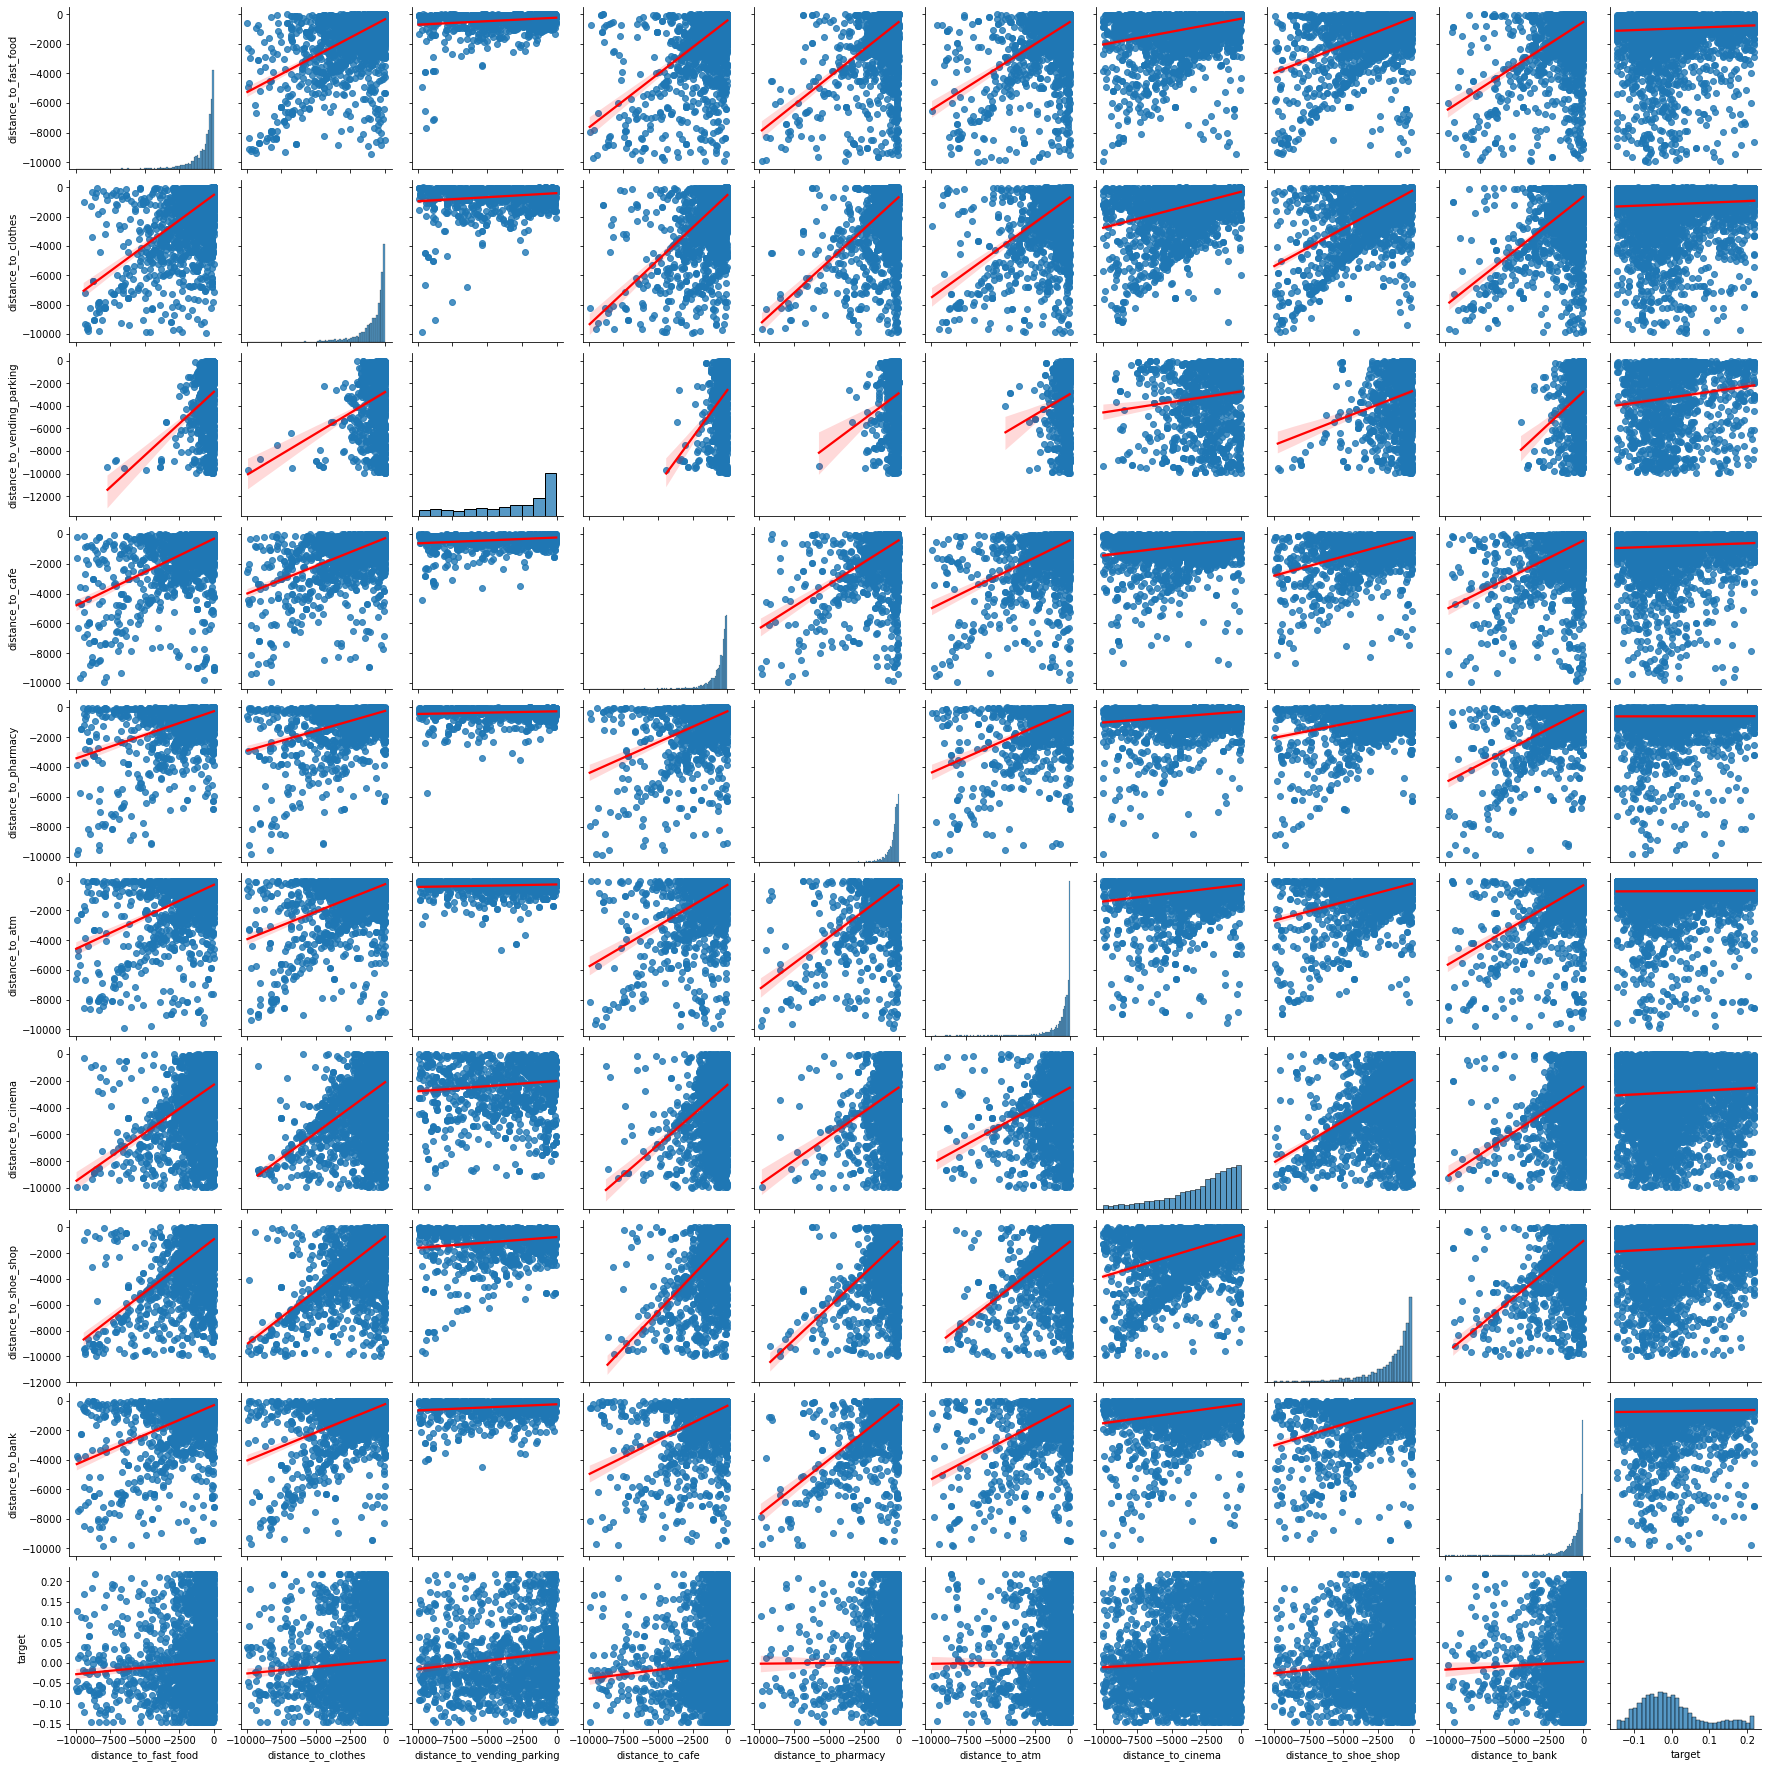

In [21]:
sns.pairplot(df_train[['distance_to_fast_food',
                       'distance_to_clothes', 'distance_to_vending_parking',
                       'distance_to_cafe', 'distance_to_pharmacy', 'distance_to_atm',
                       'distance_to_cinema', 'distance_to_shoe_shop', 'distance_to_bank', 'target']], 
             kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

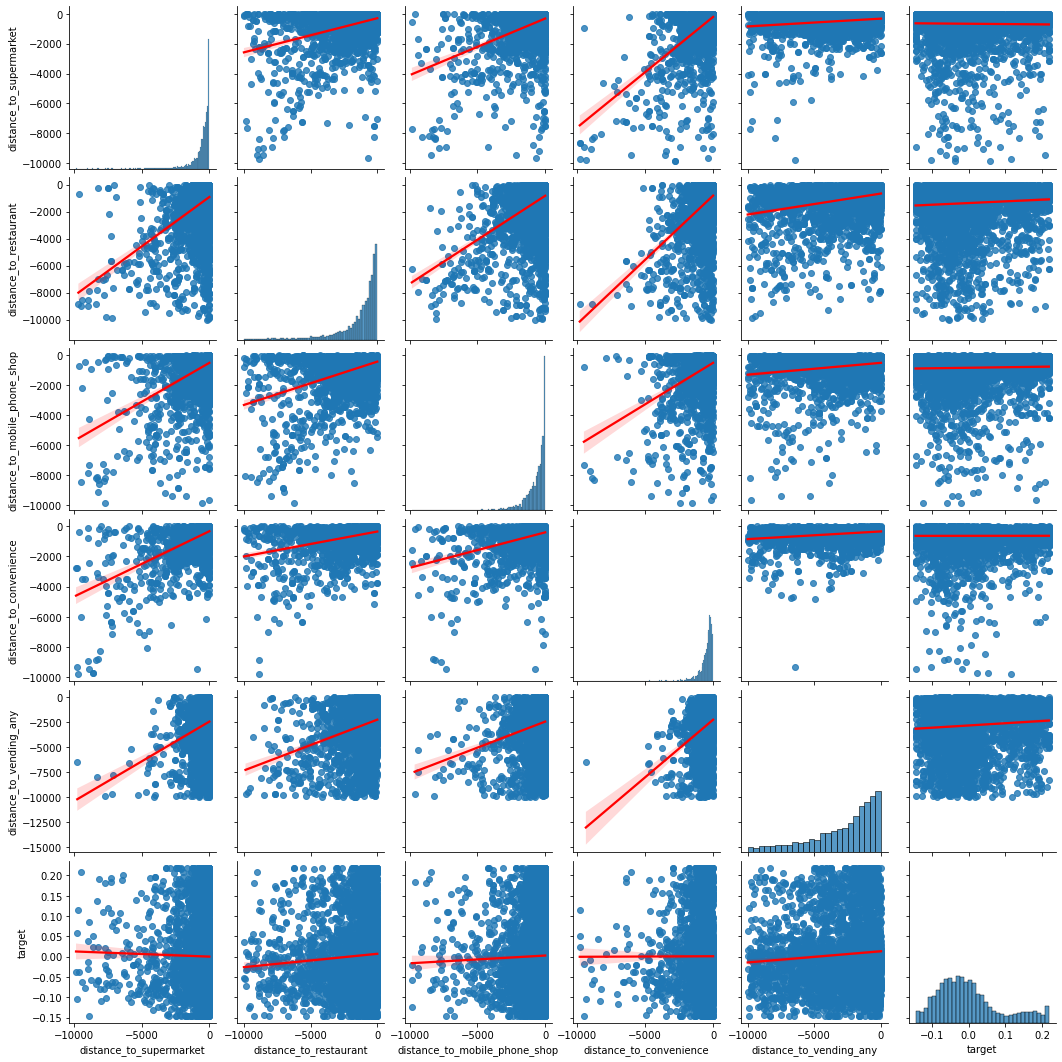

In [22]:
sns.pairplot(df_train[['distance_to_supermarket', 'distance_to_restaurant',
       'distance_to_mobile_phone_shop', 'distance_to_convenience',
       'distance_to_vending_any', 'target']], kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

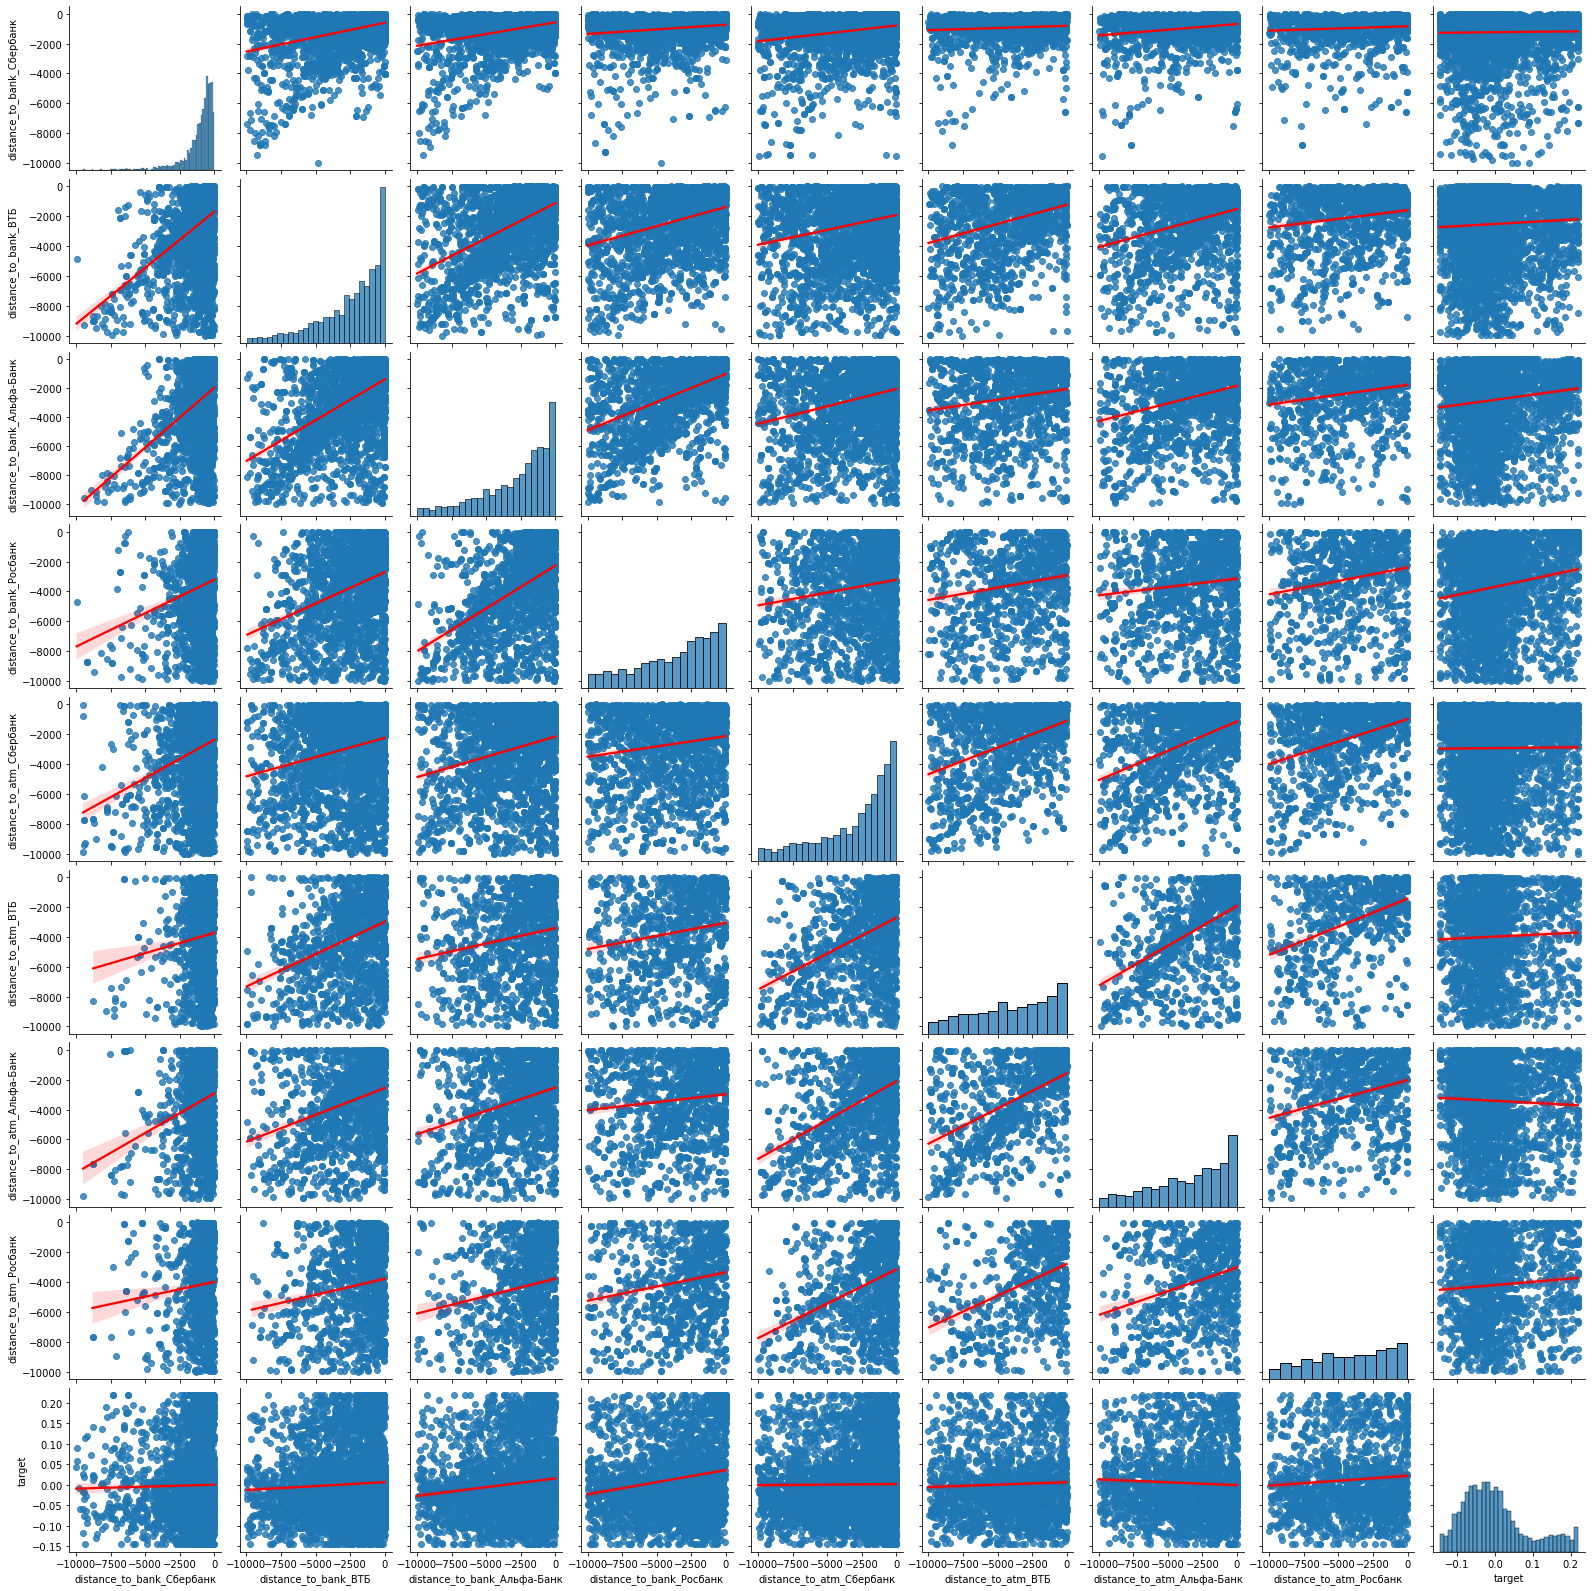

In [23]:
sns.pairplot(df_train[['distance_to_bank_Сбербанк',
       'distance_to_bank_ВТБ', 'distance_to_bank_Альфа-Банк',
       'distance_to_bank_Росбанк', 'distance_to_atm_Сбербанк',
       'distance_to_atm_ВТБ', 'distance_to_atm_Альфа-Банк',
       'distance_to_atm_Росбанк', 'target']], kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

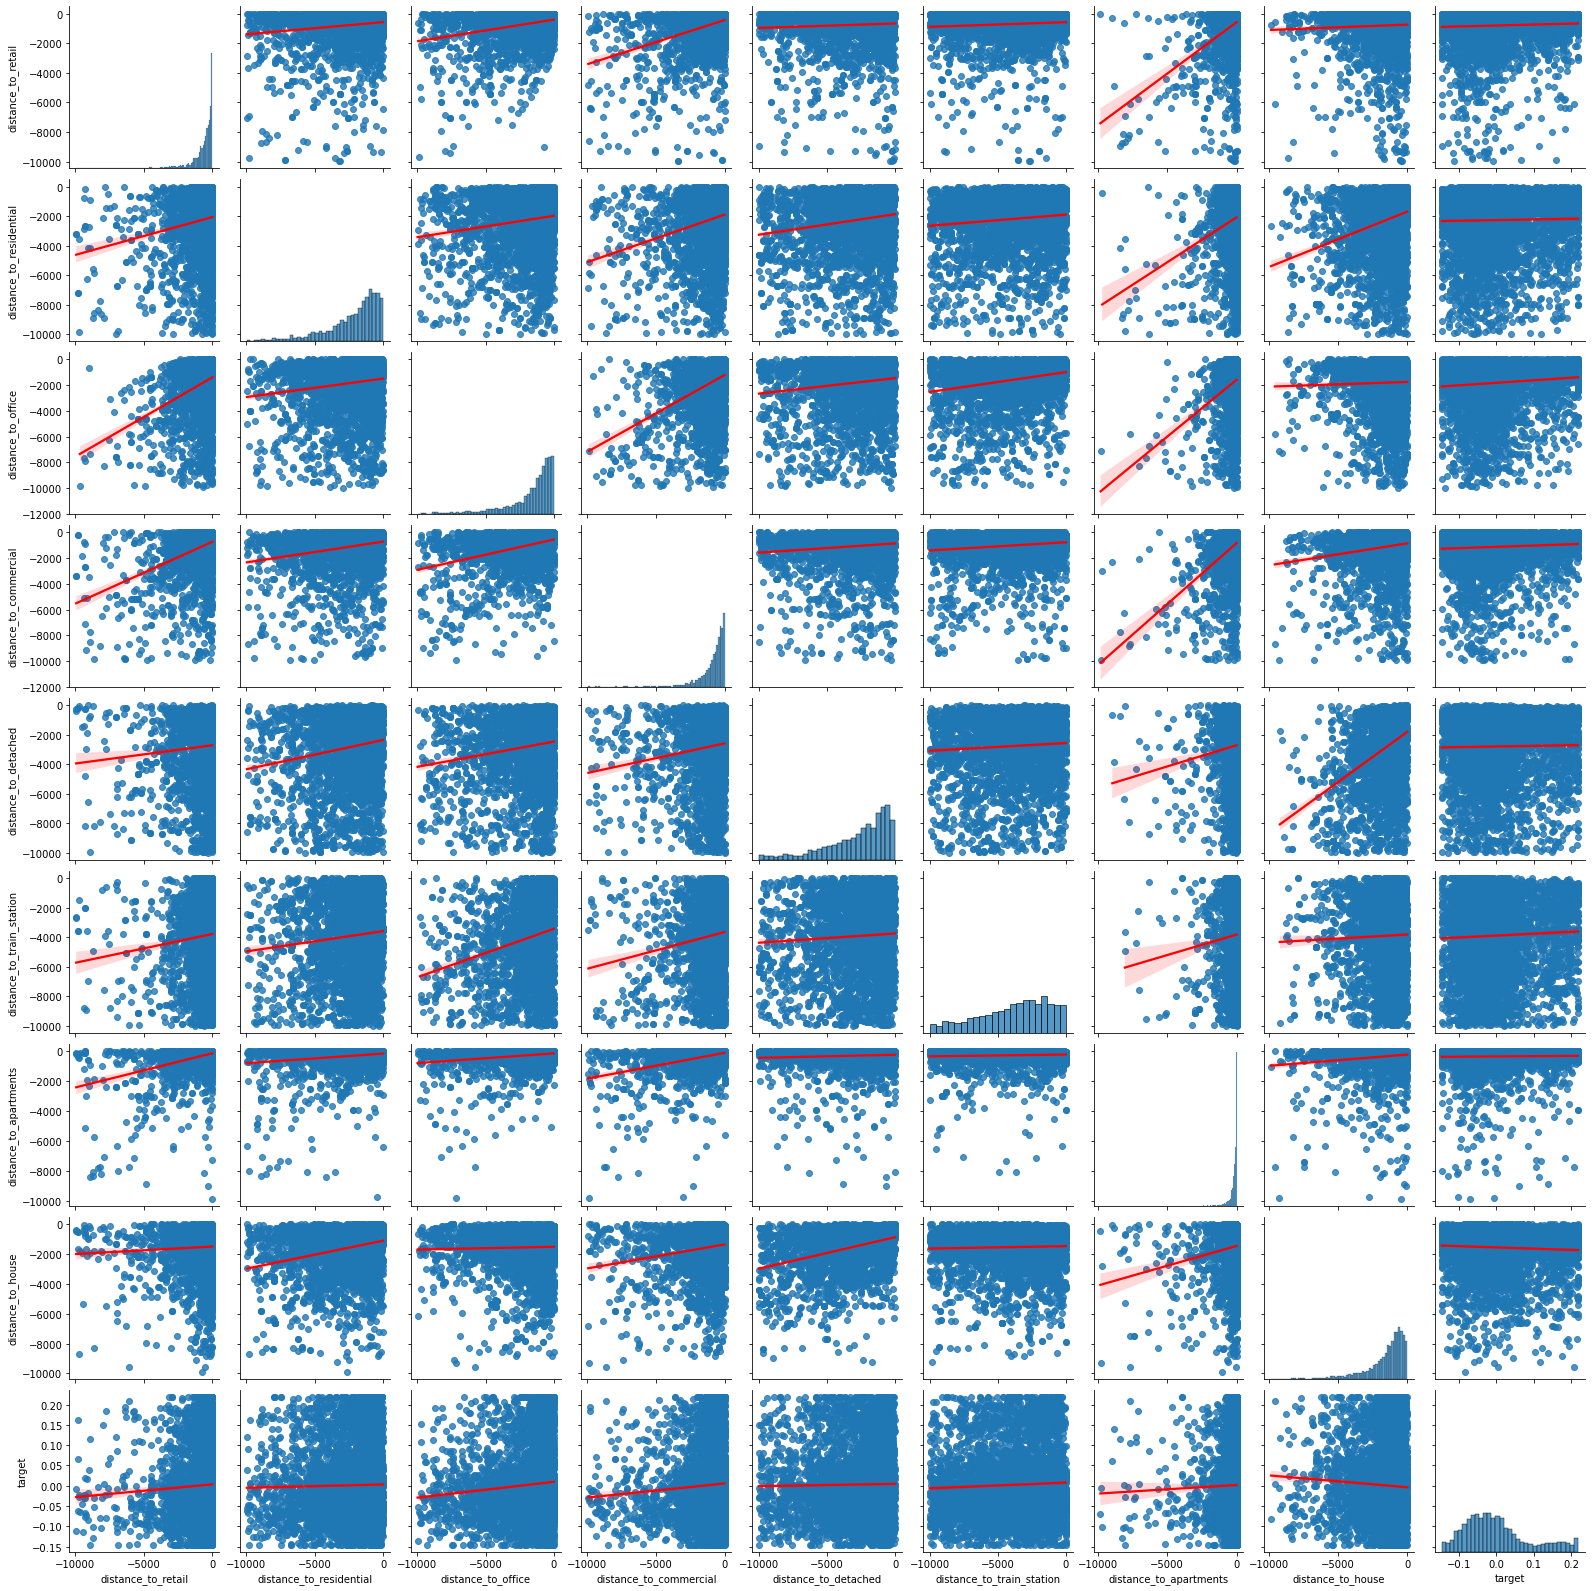

In [24]:
sns.pairplot(df_train[['distance_to_retail',
       'distance_to_residential', 'distance_to_office',
       'distance_to_commercial', 'distance_to_detached',
       'distance_to_train_station', 'distance_to_apartments',
       'distance_to_house', 'target']], kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

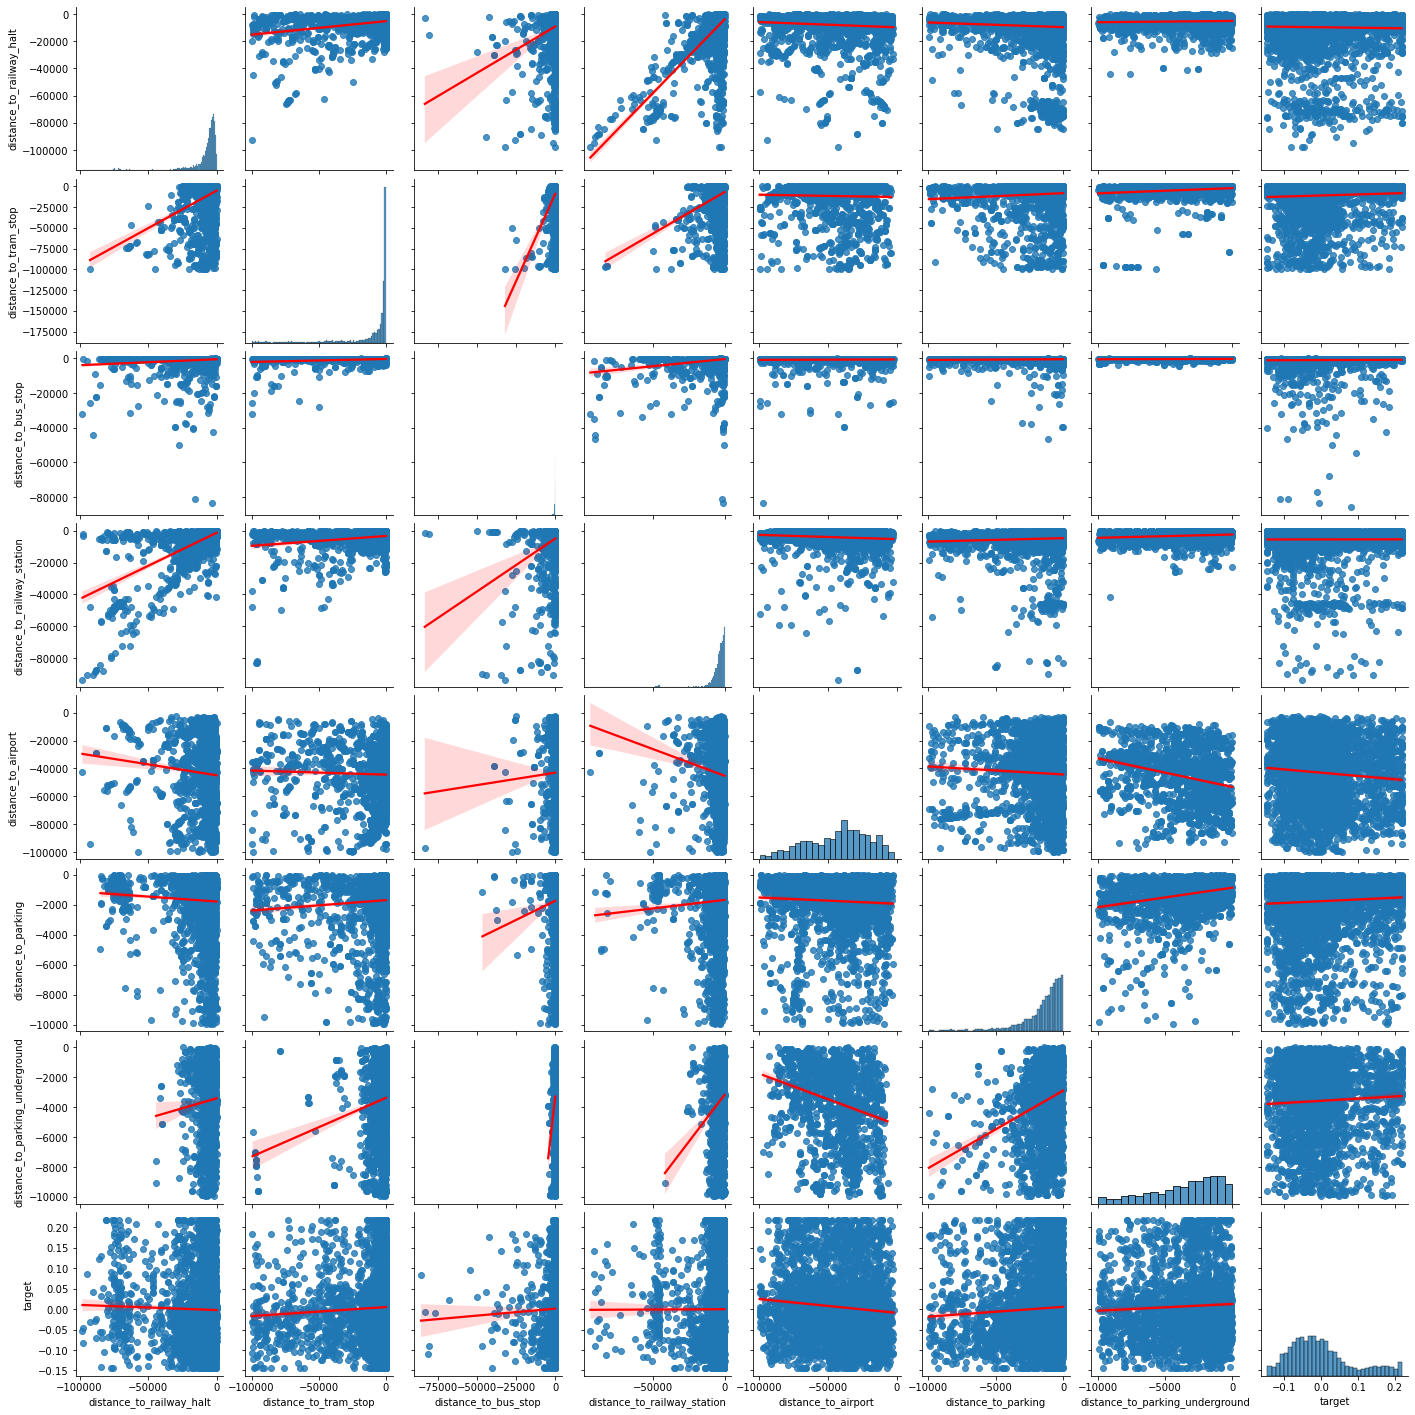

In [25]:
sns.pairplot(df_train[['distance_to_railway_halt',
       'distance_to_tram_stop', 'distance_to_bus_stop',
       'distance_to_railway_station', 'distance_to_airport',
       'distance_to_parking', 'distance_to_parking_underground', 'target']], 
             kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

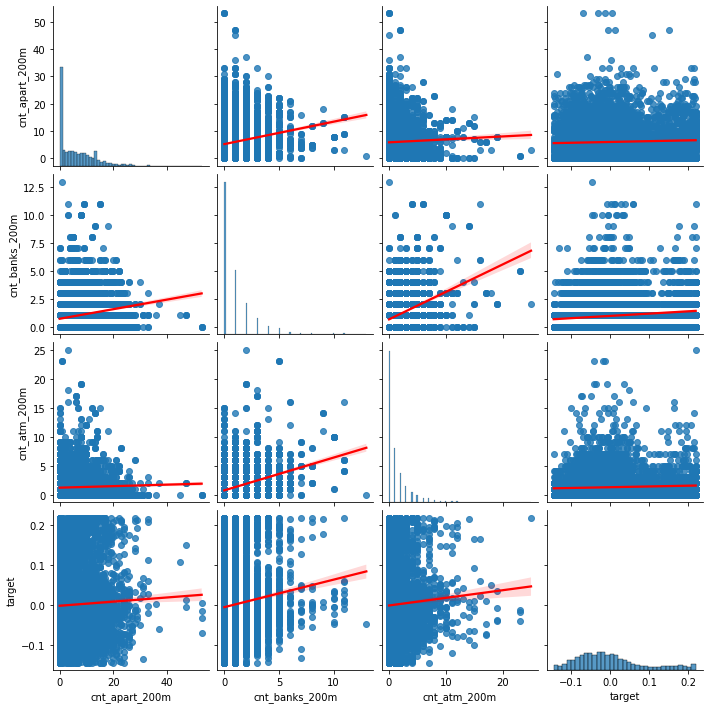

In [26]:
sns.pairplot(df_train[['cnt_apart_200m', 'cnt_banks_200m', 'cnt_atm_200m', 'cities', 'regions',
       'states', 'target']], kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

Нет смысла смотреть на зависимость признаков между собой, так как рассчитывалась дистанция до ближайшего объекта. Если посмотреть на гистограммы признаков, то видно что данные скучены ближе к началу координат (к концу координат из-за изменение знака на -)

Признаки с наибольшей кореляцией с таргетом:

distance_to_vending_parking, distance_to_atm_Росбанк,distance_to_vending_any,
distance_to_bank_ВТБ, distance_to_bank_Альфа-Банк,distance_to_bank_Росбанк

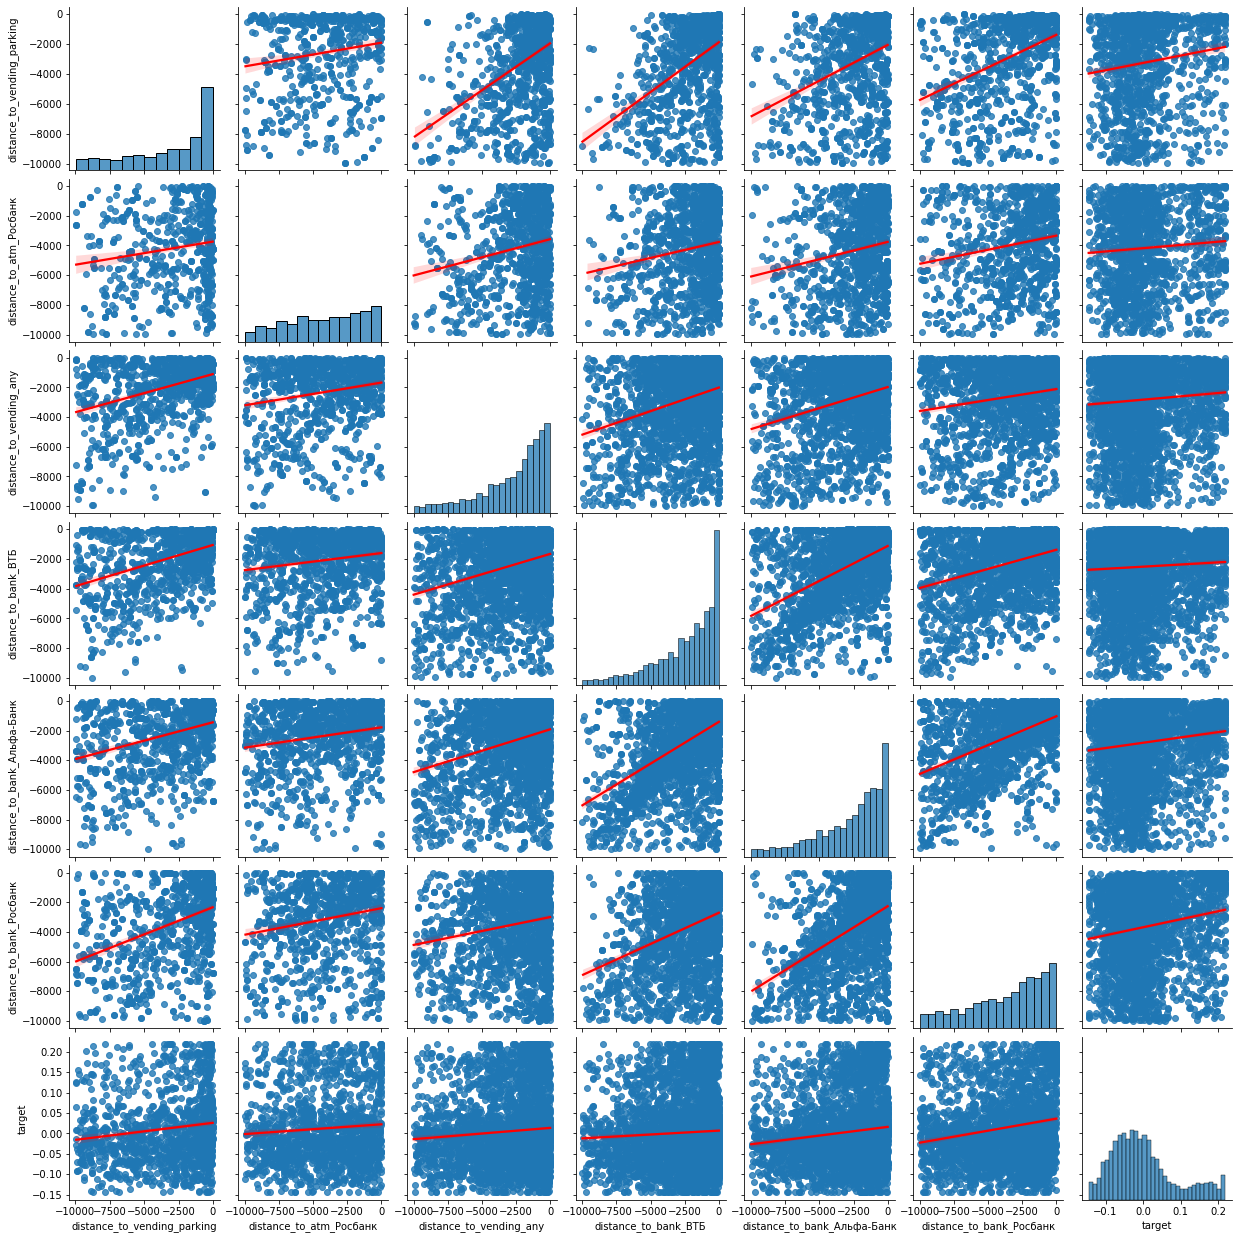

In [27]:
sns.pairplot(df_train[['distance_to_vending_parking', 'distance_to_atm_Росбанк','distance_to_vending_any', 
                       'distance_to_bank_ВТБ', 'distance_to_bank_Альфа-Банк','distance_to_bank_Росбанк','target']], 
             kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

Корреляционная матрица

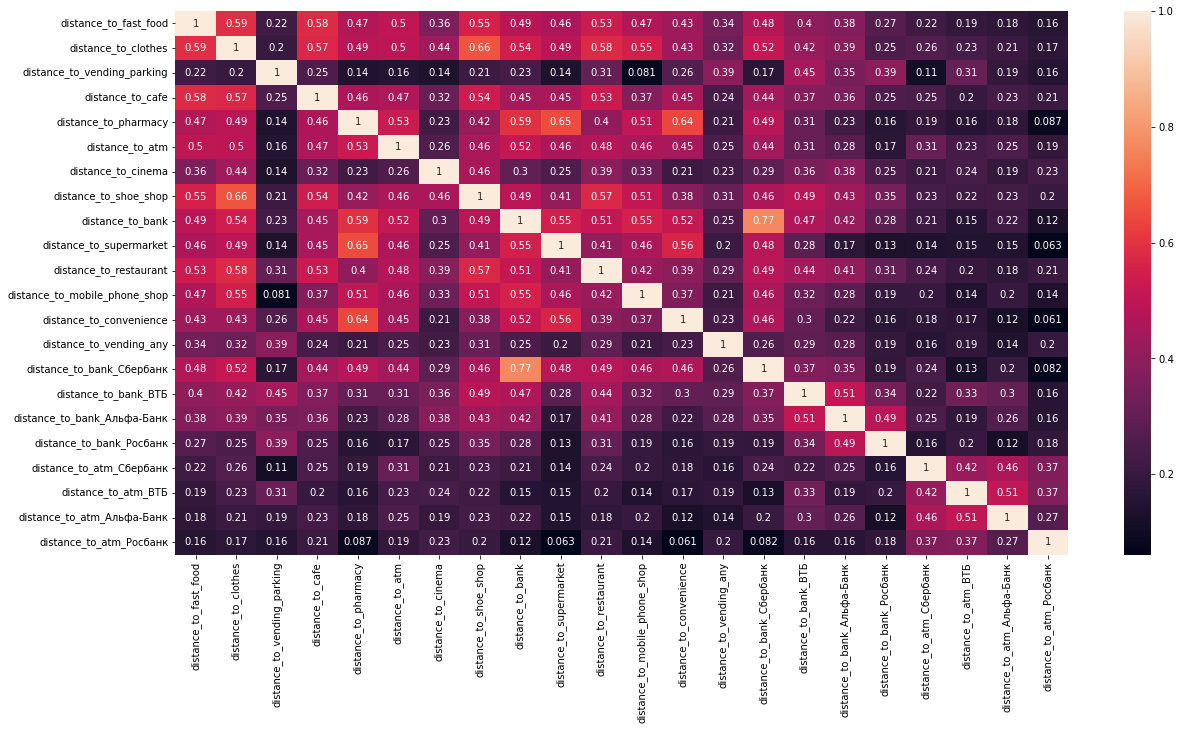

In [28]:
corr_matrix = df.iloc[:, 8:30].corr()

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True);

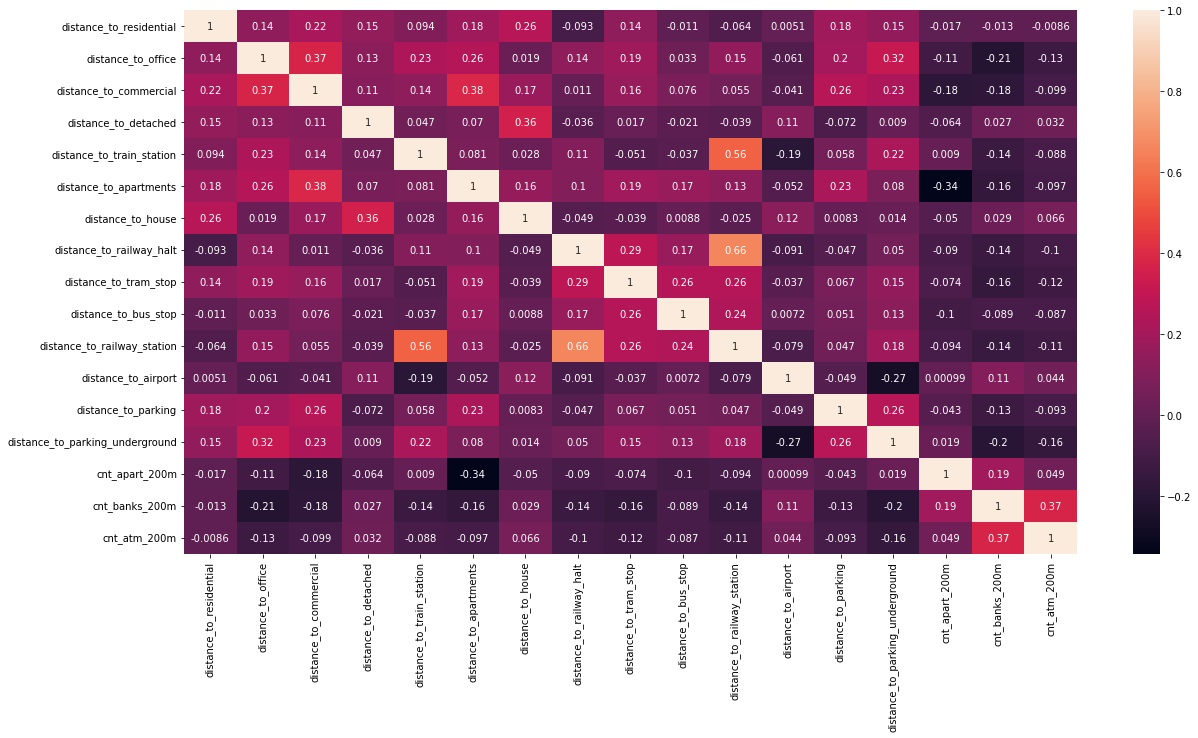

In [29]:
corr_matrix = df.iloc[:, 31:52].corr()

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True);

Посмотрим на корреляцию таргета со всеми признаками

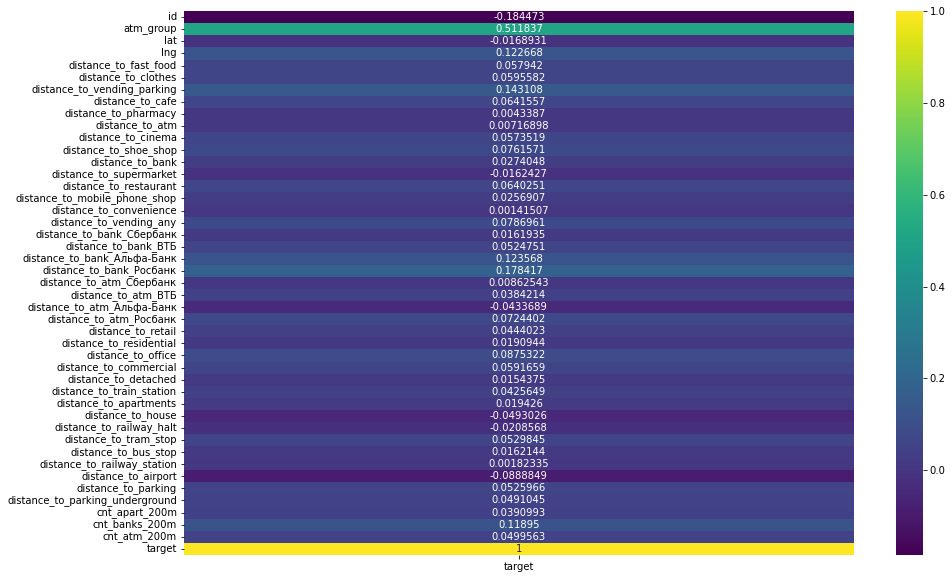

In [43]:
fig, ax = plt.subplots(figsize=(15, 10))

corr_matrix = df_train.corr()
sns.heatmap(corr_matrix[['target']], annot=True, fmt="g", cmap='viridis');


box-plots - чтобы посмотреть на размах расстояний от банкомата до объектов

<AxesSubplot:>

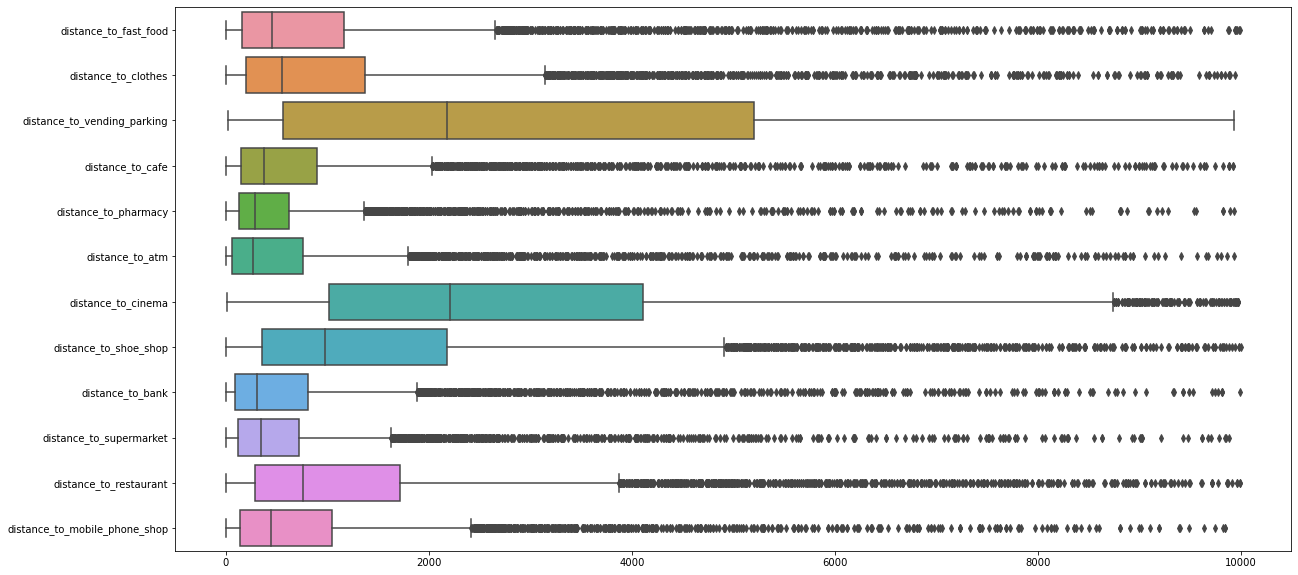

In [44]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df.iloc[:, 8:20], orient='h')

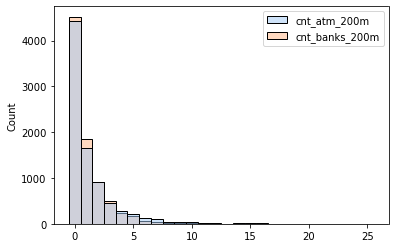

In [45]:
sns.histplot(data=df[['cnt_atm_200m', 'cnt_banks_200m']], 
             binwidth=2, palette='pastel', alpha=0.5, discrete=True);